# 3rd Down Analysis

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/juliasweet/Final_Project/SweetJ/thirdDown.csv"
Third_Down = pd.read_csv(url)
Third_Down.head()

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,short,NaN,0.0,0.386222,0.567801,4.926552,0.0


In [269]:
#number of rows and columns in a data frame
Third_Down.shape

(46877, 18)

In [270]:
#Converted vs not Converted
Third_Down['third_down_converted'].value_counts()

0.0    28375
1.0    18502
Name: third_down_converted, dtype: int64

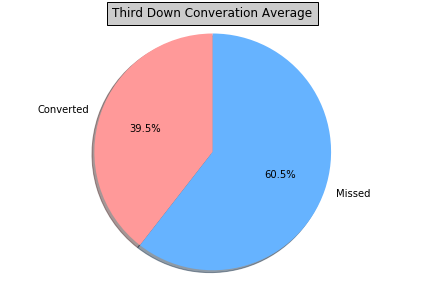

<Figure size 432x288 with 0 Axes>

In [271]:
# Pie chart
labels = ['Converted', 'Missed']
sizes = [18502, 28375]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Third Down Converation Average", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
plt.savefig('Third Down Converation Average.png')

In [272]:
#Play type Pass vs Run
Third_Down['play_type'].value_counts()

pass    37025
run      9852
Name: play_type, dtype: int64

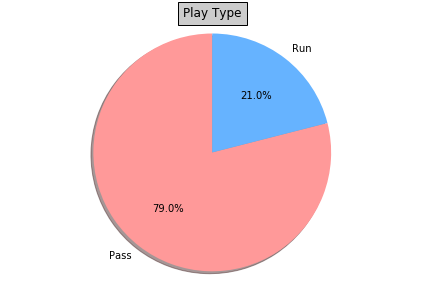

In [273]:
# Pie chart
labels = ['Pass', 'Run']
sizes = [37025, 9852]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Play Type", bbox={'facecolor':'0.8', 'pad':5})

plt.savefig('Play Type Average Comparison.png')
plt.show()

In [274]:
#Third Down Converted Average
Third_Down['third_down_converted'].mean()

0.39469249312029353

In [275]:
#Pass average converted
Third_Down[Third_Down['play_type'] == 'pass']['third_down_converted'].mean()

0.3638892640108035

In [276]:
#Run average converted
Third_Down[Third_Down['play_type'] == 'run']['third_down_converted'].mean()

0.51045473000406

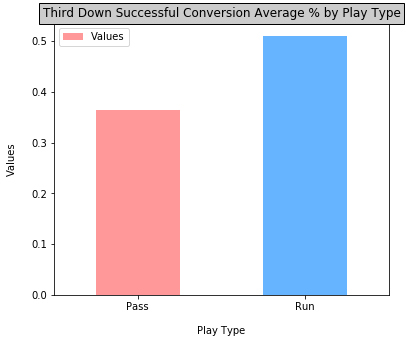

In [277]:
# Bar chart

pd.DataFrame({'Play Type':['Pass', 'Run'], 'Values':[Third_Down[Third_Down['play_type'] == 'pass']['third_down_converted'].mean(),
                                                    Third_Down[Third_Down['play_type'] == 'run']['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Third Down Successful Conversion Average % by Play Type", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Successful Conversion Average % by Play Type.png')

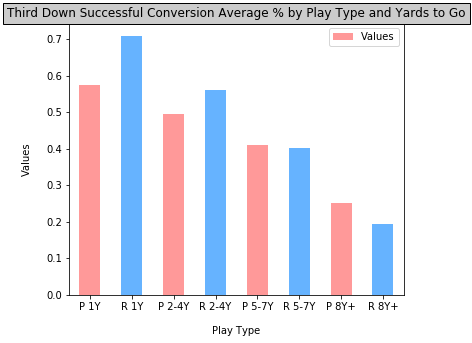

In [278]:
# Bar chart Play-Type Yards to Go

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']<2)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']<2)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>7)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>7)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Third Down Successful Conversion Average % by Play Type and Yards to Go", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Successful Conversion Average % by Play Type and Yards to Go.png')

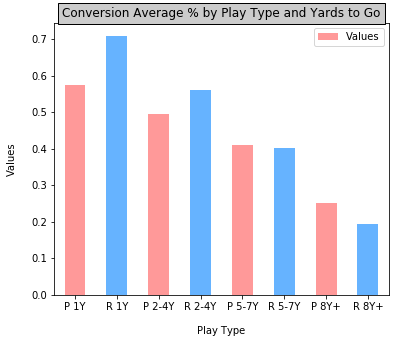

In [279]:
# Bar chart Play-Type Yards to Go

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']<2)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']<2)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>7)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>7)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Conversion Average % by Play Type and Yards to Go", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Conversion Average % by Play Type and Yards to Go.png')

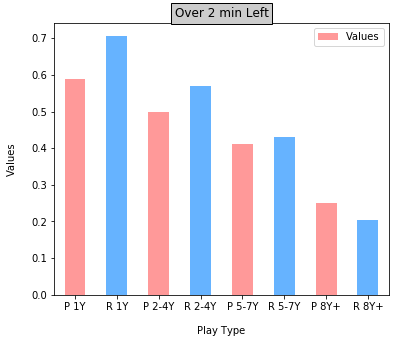

In [280]:
# Bar chart Play-Type Yards to Go Over 2 min to go

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']<2) &(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>1) & (Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>4) & (Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass') & (Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run') & (Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Over 2 min Left", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Over 2 min Left.png')

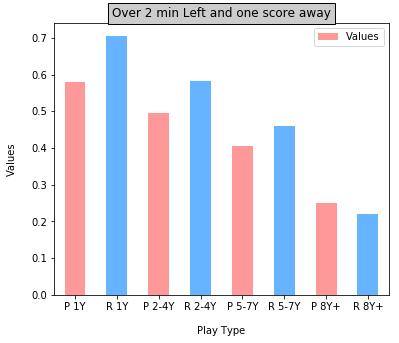

In [281]:
# Bar chart Play-Type Yards to Go Over 2 min to go with just one score away

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']<9)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Over 2 min Left and one score away", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Over 2 min Left and one score away.png')

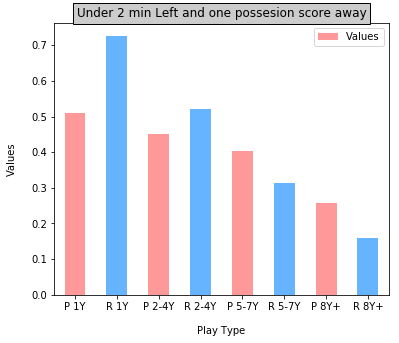

In [282]:
# Bar chart Play-Type Yards to Go Under 2 min to go with just one score away

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']<9)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Under 2 min Left and one possesion score away", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Under 2 min Left and one possesion score away.png')

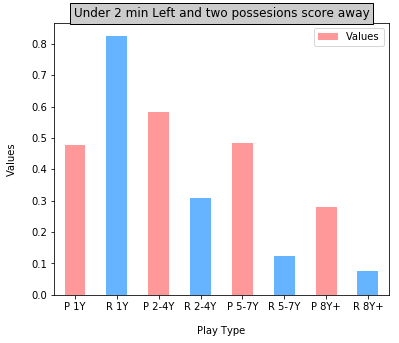

In [283]:
# Bar chart Play-Type Yards to Go Under 2 min to go with just two scores away

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']<120)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Under 2 min Left and two possesions score away", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Under 2 min Left and two possesions score away.png')

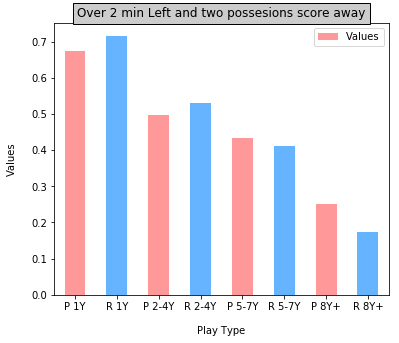

In [284]:
# Bar chart Play-Type Yards to Go Over 2 min to go with just two possesion scores away

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Over 2 min Left and two possesions score away", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Over 2 min Left and two possesions score away.png')

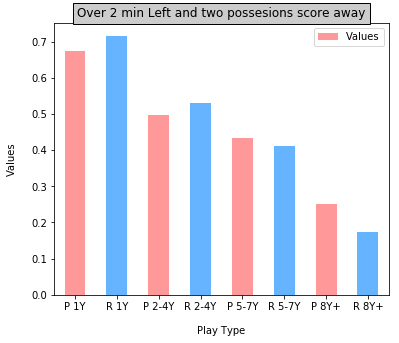

In [285]:
# Bar chart Play-Type Yards to Go Over 2 min to go with just two possesion scores away & TD_Prob >10%

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'Play Type':['P 1Y', 'R 1Y', 'P 2-4Y', 'R 2-4Y', 'P 5-7Y', 'R 5-7Y', 'P 8Y+', 'R 8Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']<2)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>1)&(Third_Down['ydstogo']<5)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>4)&(Third_Down['ydstogo']<8)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['ydstogo']>7)&(Third_Down['half_seconds_remaining']>119)&(Third_Down['score_differential']>8)&(Third_Down['score_differential']<17)]['third_down_converted'].mean()]}).plot(kind='bar', x= 'Play Type', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("Play Type", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Over 2 min Left and two possesions score away", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Over 2 min Left and two possesions score away.png')

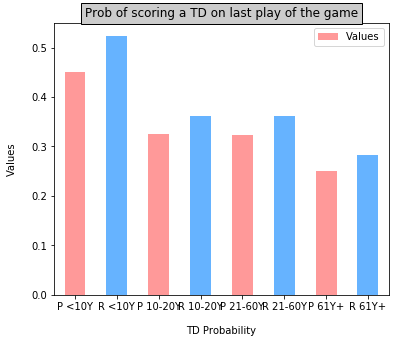

In [286]:
# Bar chart Play-Type Yards to Go Over 2 min to go with just one possesion score away

colors = ['#ff9999','#66b3ff']
pd.DataFrame({'TD Probability':['P <10Y', 'R <10Y', 'P 10-20Y', 'R 10-20Y', 'P 21-60Y', 'R 21-60Y', 'P 61Y+', 'R 61Y+'], 
              'Values':[Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['yardline_100']<10)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(),
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['yardline_100']<10)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['yardline_100']>9)&(Third_Down['yardline_100']<31)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['yardline_100']>9)&(Third_Down['yardline_100']<31)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['yardline_100']>30)&(Third_Down['yardline_100']<51)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['yardline_100']>30)&(Third_Down['yardline_100']<51)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'pass')&(Third_Down['yardline_100']>50)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean(), 
                        Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['yardline_100']>50)&(Third_Down['half_seconds_remaining']>20)]['td_prob'].mean()]}).plot(kind='bar', x= 'TD Probability', y='Values', figsize=(6,5), rot=0, colors= colors)
plt.xlabel("TD Probability", labelpad=14)
plt.ylabel("Values", labelpad=14)
plt.title("Prob of scoring a TD on last play of the game", bbox={'facecolor':'0.8', 'pad':4});

plt.savefig('Prob of scoring a TD on last play of the game.png')

In [287]:
TD_10_20Y = Third_Down[(Third_Down['play_type'] == 'run')&(Third_Down['yardline_100']>9)&(Third_Down['yardline_100']<31)&(Third_Down['half_seconds_remaining']<20)]
TD_10_20Y

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
894,894,1908,2018093007,1,0,3,10.0,run,11.0,3.0,NaN,NaN,middle,4.0,0.496568,0.206320,2.824842,0.0
5267,5267,1781,2017092412,1,0,19,21.0,run,16.0,3.0,NaN,NaN,middle,-10.0,0.450985,0.143767,2.171886,0.0
7006,7006,1828,2017111205,1,0,28,30.0,run,19.0,3.0,NaN,NaN,middle,-3.0,0.378244,0.126469,1.771359,0.0
7597,7597,2471,2017112608,1,0,5,25.0,run,14.0,3.0,NaN,NaN,middle,-7.0,0.385295,0.178964,2.228274,1.0
20259,20259,2126,2014101600,0,0,25,27.0,run,11.0,3.0,NaN,NaN,left,2.0,0.398185,0.130572,1.883826,0.0
22253,22253,1879,2014120702,0,0,14,14.0,run,17.0,3.0,NaN,NaN,left,-14.0,0.596920,0.163942,2.868795,0.0
23626,23626,2507,2013091200,0,0,10,25.0,run,11.0,3.0,NaN,NaN,middle,10.0,0.398231,0.157117,2.100759,0.0
23678,23678,4327,2013091508,0,0,7,28.0,run,14.0,3.0,NaN,NaN,middle,0.0,0.366737,0.164832,2.051706,0.0
24343,24343,1972,2013092903,1,0,9,29.0,run,10.0,3.0,NaN,NaN,middle,14.0,0.360555,0.155135,1.955916,0.0
25015,25015,1941,2013101312,1,0,10,17.0,run,9.0,3.0,NaN,NaN,middle,-10.0,0.467914,0.163141,2.391314,0.0


In [ ]:
run_plays = Third_Down[Third_Down['play_type'] == 'run']

In [309]:
Third_Down['new_dep1'] = Third_Down.apply(new_dep,axis=1)

In [310]:
Third_Down['new_dep1'].mean()

0.38961038961038963

In [ ]:
 if row['play_type'] == 'run':
            if row['third_down_converted'] == 1:
                #run converted
                return 1
            else:
                return 0
    else:
        if row['play_type'] == 'pass':
            if row['third_down_converted'] == 0:
                return 0
            else:
                return 1
        else:
            if row['third_down_converted'] == 0:
                return 0
            else:
                return 1

In [224]:
x = Third_Down[['fg_prob','td_prob','play_type']]

In [225]:
x.shape

(46877, 3)

In [226]:
x['play_type'] = x['play_type'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
# x.head()
x['play_type'].replace(['run','pass'],[0,1],inplace=True)

In [228]:
x.head()

,fg_prob,td_prob,play_type
0,0.415009,0.333712,1
1,0.204515,0.749825,1
2,0.093928,0.213978,1
3,0.395592,0.377457,0
4,0.386222,0.567801,1


In [218]:
x.corr()

,fg_prob,td_prob,play_type
fg_prob,1.000000,0.468772,0.015905
td_prob,0.468772,1.000000,-0.190791
play_type,0.015905,-0.190791,1.000000


In [220]:
Third_Down[['fg_prob','td_prob','play_type']].corr()

,fg_prob,td_prob
fg_prob,1.000000,0.468772
td_prob,0.468772,1.000000


In [232]:
# 2<Yardstogo<4 with less than 2 min remaining and score-diff = one posession
def new_dep1(row):
    
    if row['ydstogo'] >2 & row['ydstogo'] <4 and row['half_seconds_remaining'] <121 and row['score_differential'] <9:
        if row['play_type'] == 'pass':
            if row['third_down_converted'] == 1:
                return 1
            else:
                #pass not converted
                return 0
        if row['play_type'] == 'run':
            if row['third_down_converted'] == 0:
                #run not converted
                return 0
            else:
                return 1
    else:
        if row['play_type'] == 'pass':
            if row['third_down_converted'] == 0:
                return 0
            else:
                return 1
        else:
            if row['third_down_converted'] == 1:
                return 1
            else:
                return 0
                
#'td_prob' >10 <10(<1, 2-4, 5-7, >8 'ydstogo','half_seconds_remaining' <2 min > 2 min, 'score_differential' >9, 9-16, >16  

In [233]:
x1 = Third_Down[['fg_prob','td_prob','play_type']]

In [234]:
x1.shape

(46877, 3)

In [235]:
# x.head()
x1['play_type'].replace(['run','pass'],[0,1],inplace=True)

In [236]:
x1.head()

,fg_prob,td_prob,play_type
0,0.415009,0.333712,1
1,0.204515,0.749825,1
2,0.093928,0.213978,1
3,0.395592,0.377457,0
4,0.386222,0.567801,1


In [174]:
Third_Down.head()

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,short,NaN,0.0,0.386222,0.567801,4.926552,0.0


In [285]:
Third_Down['new_dep1'] = Third_Down.apply(new_dep,axis=1)

In [286]:
Third_Down['new_dep1'].mean()

0.38961038961038963

In [284]:
Third_Down['play_type'].value_counts()

pass    37025
run      9852
Name: play_type, dtype: int64

In [178]:
37000/ (9850 + 37000.)

0.7897545357524013

In [179]:
run_plays = Third_Down[Third_Down['play_type'] == 'run']
run_plays.shape

(9852, 19)

In [180]:
run_plays[run_plays['ydstogo'] > 40]

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted,new_dep
21129,21129,3785,2014110905,0,0,46,78.0,run,105.0,3.0,NaN,NaN,right,14.0,0.101425,0.063212,0.034093,0.0,0


In [181]:
run_plays['ydstogo'].describe()

count    9852.000000
mean        4.933821
std         5.442391
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        46.000000
Name: ydstogo, dtype: float64

In [182]:
y.value_counts()

pass    37025
run      9852
Name: play_type, dtype: int64

In [183]:
37025. / (37025 + 9852.)

0.7898329671267359

In [184]:
Third_Down[Third_Down['ydstogo'] <= 7].shape

(27628, 19)

In [291]:
url = "https://raw.githubusercontent.com/juliasweet/Final_Project/SweetJ/finalBalance.csv"
Final_Balance = pd.read_csv(url)
Final_Balance.head()

,Unnamed: 0,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,1,0,13,75.0,pass,735.0,3.0,-3.0,0.163596,0.221572,-0.728013,0.0
1,1,1,0,9,20.0,pass,419.0,3.0,0.0,0.491748,0.313103,3.110654,0.0
2,2,1,0,8,79.0,pass,1399.0,3.0,5.0,0.150793,0.239080,-1.075599,0.0
3,3,1,0,7,70.0,pass,900.0,3.0,-13.0,0.194591,0.280941,0.016882,0.0
4,4,1,0,6,48.0,pass,1447.0,3.0,-7.0,0.339833,0.356560,1.918829,0.0


In [303]:
#Define X & Y From Right side
X = Final_Balance[['ydstogo','half_seconds_remaining', 'score_differential', 'yardline_100','fg_prob', 'td_prob']]
y = Final_Balance['play_type']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
Final_Balance.dtypes

Unnamed: 0                  int64
shotgun                     int64
no_huddle                   int64
ydstogo                     int64
yardline_100              float64
play_type                  object
half_seconds_remaining    float64
down                      float64
score_differential        float64
fg_prob                   float64
td_prob                   float64
ep                        float64
third_down_converted      float64
dtype: object

In [296]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        pass       0.67      0.69      0.68      2463
         run       0.68      0.66      0.67      2463

   micro avg       0.67      0.67      0.67      4926
   macro avg       0.67      0.67      0.67      4926
weighted avg       0.67      0.67      0.67      4926



#The f1-score gives you the harmonic mean of precision and recall
#The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes
#The support is the number of samples of the true response that lie in that class

In [298]:
# Create the logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
classifier.fit(X_train, y_train)
print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 Actual Labels: {y_test[:10].tolist()}")
pd.DataFrame({"Prediction:": predictions, "Actual:": y_test}).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


First 10 predictions: ['pass' 'pass' 'run' 'pass' 'run' 'pass' 'run' 'pass' 'run' 'pass']
First 10 Actual Labels: ['pass', 'pass', 'run', 'pass', 'run', 'pass', 'pass', 'pass', 'run', 'pass']


,Prediction:,Actual:
0,pass,pass
1,pass,pass
2,run,run
3,pass,pass
4,run,run
5,pass,pass
6,run,pass
7,pass,pass
8,run,run
9,pass,pass


In [299]:
from sklearn.metrics import confusion_matrix

In [300]:
confusion_matrix(y_test, predictions)

array([[1690,  773],
       [ 830, 1633]], dtype=int64)

In [301]:
from sklearn.metrics import accuracy_score

In [302]:
accuracy_score(y_test, predictions)

0.6745838408444986

# Prediction


In [304]:
#Play_type
#run = 1, pass =2
CR_Final=Final_Balance.replace(['run', 'pass'], 
                     [1, 2])
CR_Final.head()
CR_F= CR_Final.astype({"play_type": int})
CR_F.head()

,Unnamed: 0,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,1,0,13,75.0,2,735.0,3.0,-3.0,0.163596,0.221572,-0.728013,0.0
1,1,1,0,9,20.0,2,419.0,3.0,0.0,0.491748,0.313103,3.110654,0.0
2,2,1,0,8,79.0,2,1399.0,3.0,5.0,0.150793,0.239080,-1.075599,0.0
3,3,1,0,7,70.0,2,900.0,3.0,-13.0,0.194591,0.280941,0.016882,0.0
4,4,1,0,6,48.0,2,1447.0,3.0,-7.0,0.339833,0.356560,1.918829,0.0


In [305]:
un = 1, pass =2
CR_Final=Final_Balance.replace(['run', 'pass'], 
                     [1, 2])
CR_Final.head()
CR_F= CR_Final.astype({"play_type": int})
CR_F.head()

SyntaxError: invalid syntax (<ipython-input-305-3b415ebd005c>, line 1)

In [306]:
#Play_type
#run = 1, pass =2
CR_Final=Final_Balance.replace(['run', 'pass'], 
                     [1, 2])
CR_Final.head()
CR_Final = CR_Final.astype({"play_type": int})
CR_Final.dtypes

Unnamed: 0                  int64
shotgun                     int64
no_huddle                   int64
ydstogo                     int64
yardline_100              float64
play_type                   int32
half_seconds_remaining    float64
down                      float64
score_differential        float64
fg_prob                   float64
td_prob                   float64
ep                        float64
third_down_converted      float64
dtype: object

In [307]:

#Define X & Y From Right side
X1 = Final_Balance[['td_prob','ydstogo','half_seconds_remaining', 'score_differential']]
y1 = Final_Balance['third_down_converted']

# Split into test and train
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1, stratify=y1)
Final_Balance.dtypes

Unnamed: 0                  int64
shotgun                     int64
no_huddle                   int64
ydstogo                     int64
yardline_100              float64
play_type                  object
half_seconds_remaining    float64
down                      float64
score_differential        float64
fg_prob                   float64
td_prob                   float64
ep                        float64
third_down_converted      float64
dtype: object

In [308]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X1_train,y1_train)
predictions = logmodel.predict(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [309]:
# Create the logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
classifier.fit(X1_train, y1_train)
print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 Actual Labels: {y1_test[:10].tolist()}")
pd.DataFrame({"Prediction:": predictions, "Actual:": y1_test}).reset_index(drop=True)

First 10 predictions: [1. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
First 10 Actual Labels: [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Prediction:,Actual:
0,1.0,0.0
1,0.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,0.0


In [211]:
confusion_matrix(y1_test, predictions)

array([[5684, 1410],
       [2638, 1988]], dtype=int64)

In [157]:
for x in Third_Down.columns:
    if x not in weights.keys():
        print (x)

Unnamed: 0
play_id
game_id
play_type
down
pass_length
pass_length.1
run_location
new_dep


In [158]:
X1_train.head()

,td_prob,ydstogo,half_seconds_remaining,fg_prob,score_differential,yardline_100,play_type
29362,0.355049,5,1653.0,0.301795,0.0,53.0,pass
33569,0.357882,7,904.0,0.446105,0.0,32.0,pass
23098,0.396644,1,1560.0,0.174244,-7.0,71.0,pass
27595,0.264085,8,287.0,0.264759,3.0,47.0,pass
21109,0.477436,1,1434.0,0.342758,0.0,39.0,pass
